<a href="https://colab.research.google.com/github/utkarshkant/Deep-Learning/blob/main/ANN_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANN

Today's agenda
- ANN practical implementation
- Early stopping
- Black box models vs white box models
- CNN implementation

# Churn Prediction
Objective: Predict if the customer is about to churn or not from the bank

## Imports & Data Load

In [ ]:
# imports
import tensorflow as tf
tf.__version__

'2.8.2'

In [ ]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, ReLU, LeakyReLU, PReLU, ELU, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# configurations
sns.set_style('whitegrid')
# plt.rcParams['figure.figsize'] = (15,5)

In [ ]:
# load data
df = pd.read_csv('/content/drive/MyDrive/Ineuron/Deep Learning 5 Days/Churn_Modelling.csv')

## Data Exploration

In [ ]:
# preview data
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### Metadata

In [ ]:
# metadata - summary statistics
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
# metadata - feature info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Duplicates

In [ ]:
df.duplicated().sum()

0

- no duplicate values found

### Missing values


In [ ]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

- no missing values found

## Data preparation

### Independent vs Dependent Features


In [ ]:
# independent vs dependent features
X = df.iloc[:, 3:-1]
y = df.iloc[:, -1]

In [ ]:
X.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57


In [ ]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

### Encoding Categorical Features

In [ ]:
# categorical features
X.select_dtypes(include=['object']).columns

Index(['Geography', 'Gender'], dtype='object')

In [ ]:
# encode categorical features
dummies = pd.get_dummies(X[['Geography', 'Gender']], drop_first=True)

# drop from original dataset
X.drop(['Geography', 'Gender'], axis=1, inplace=True)

# merge dummy data with original dataset
X = X.join(dummies)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


### Train test split

In [ ]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Feature Scaling

In [ ]:
# feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

## Modelling

In [ ]:
# create model - ann
model = Sequential()
model.add(Dense(units=X.shape[1], activation='relu'))   # input layer
model.add(Dense(units=7, activation='relu'))            # hidden layer
model.add(Dense(units=6, activation='relu'))            # hidden layer
model.add(Dense(units=1, activation='sigmoid'))         # hidden layer

# Adam optimizer with custom learning rate
opt = tf.keras.optimizers.Adam(learning_rate=0.01)

# compile ann
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# model training
model_history = model.fit(X_train, y_train, 
                          validation_split=0.33, 
                          batch_size=10,
                          epochs=1000)

Epoch 1/1000
536/536 [==============================] - 6s 4ms/step - loss: 0.4168 - accuracy: 0.8237 - val_loss: 0.3808 - val_accuracy: 0.8353
Epoch 2/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3632 - accuracy: 0.8500 - val_loss: 0.3631 - val_accuracy: 0.8535
Epoch 3/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3549 - accuracy: 0.8530 - val_loss: 0.3632 - val_accuracy: 0.8519
Epoch 4/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3483 - accuracy: 0.8591 - val_loss: 0.3659 - val_accuracy: 0.8504
Epoch 5/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3475 - accuracy: 0.8565 - val_loss: 0.3665 - val_accuracy: 0.8466
Epoch 6/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3493 - accuracy: 0.8569 - val_loss: 0.3576 - val_accuracy: 0.8538
Epoch 7/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3488 - accuracy: 0.8535 - val_loss: 0.3612 - val_accuracy:

KeyboardInterrupt: ignored

In [ ]:
# early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

# model training
model_history = model.fit(X_train, y_train,
                          validation_split=0.33,
                          batch_size=10,
                          epochs=1000,
                          callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3171 - accuracy: 0.8673 - val_loss: 0.3668 - val_accuracy: 0.8557
Epoch 2/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3188 - accuracy: 0.8696 - val_loss: 0.3735 - val_accuracy: 0.8485
Epoch 3/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3188 - accuracy: 0.8684 - val_loss: 0.3803 - val_accuracy: 0.8535
Epoch 4/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3163 - accuracy: 0.8711 - val_loss: 0.3634 - val_accuracy: 0.8531
Epoch 5/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3163 - accuracy: 0.8698 - val_loss: 0.3826 - val_accuracy: 0.8516
Epoch 6/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3179 - accuracy: 0.8696 - val_loss: 0.3741 - val_accuracy: 0.8516
Epoch 7/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3151 - accuracy: 0.8668 - val_loss: 0.3889 - val_accuracy:

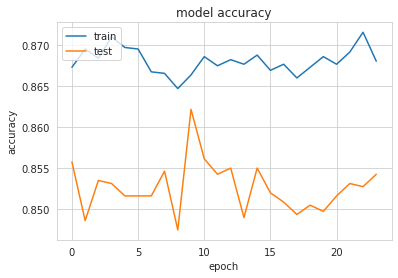

In [ ]:
# plot model performance
# model_history.history.keys()
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

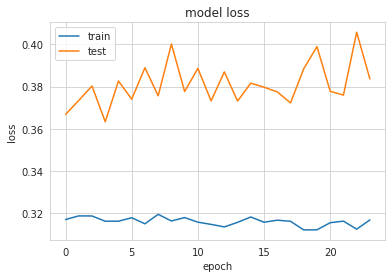

In [ ]:
# plot model performance
# model_history.history.keys()
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# model prediction on test data
y_pred = model.predict(X_test)
y_pred = (y_pred >= 0.5)    # threshold

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1538,   57],
       [ 223,  182]])

In [ ]:
# accuracy
acc = accuracy_score(y_pred, y_test)
acc

0.86

In [ ]:
# get model weights
model.get_weights()

[array([[-0.17509447, -0.11937917,  0.5514316 ,  0.36557597, -1.1757728 ,
          0.34544483,  1.0451946 ,  0.8514616 ,  1.0448871 ,  0.5850413 ,
          0.46555248],
        [ 0.09321531,  2.8602645 ,  0.55204123, -4.9429626 ,  2.1820652 ,
         -1.6969427 , -0.39621577,  1.6310939 , -1.1966131 ,  0.15132357,
         -0.9193499 ],
        [ 0.34023774, -0.07335477,  0.01957691, -0.15449223, -1.8971318 ,
         -0.46552536, -1.325703  , -0.14319041,  1.0405793 , -0.840208  ,
          1.1865835 ],
        [-3.0633957 , -0.12299725, -0.29233924,  0.3535789 ,  1.7562199 ,
         -0.03851776,  1.8975931 ,  2.7000053 , -2.3340542 ,  3.061828  ,
         -3.1187057 ],
        [-4.1768975 , -0.02825884,  0.16988412,  0.11099281, -0.14830557,
          2.3688304 , -0.7283331 ,  3.971482  , -1.1891383 , -2.4432514 ,
          3.4120624 ],
        [-0.7007084 , -0.28456718,  0.8757623 , -0.37503362,  0.226706  ,
          1.9100682 ,  3.0226495 , -0.5435759 , -1.4647743 ,  0.4039268

In [ ]:
# ann with dropout layer
model2 = Sequential()
model2.add(Dense(units=X.shape[1], activation='relu'))  # input layer

model2.add(Dense(units=7, activation='relu'))           # hidden layer
model2.add(Dropout(0.2))                                # dropout layer

model.add(Dense(units=6, activation='relu'))            # hidden layer
model2.add(Dropout(0.3))                                # dropout layer

model2.add(Dense(units=1, activation='sigmoid'))        # output layer

# optimizer
opt = Adam(learning_rate=0.01)                          # custom learning rate

# early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False
)

# compile ann
model2.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# model training
history = model2.fit(X_train, y_train,
                     validation_split=0.33,
                     batch_size=10,
                     epochs=1000,
                     callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 3s 4ms/step - loss: 0.4744 - accuracy: 0.7959 - val_loss: 0.4133 - val_accuracy: 0.8126
Epoch 2/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4255 - accuracy: 0.8140 - val_loss: 0.4126 - val_accuracy: 0.8114
Epoch 3/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4214 - accuracy: 0.8132 - val_loss: 0.3960 - val_accuracy: 0.8160
Epoch 4/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4105 - accuracy: 0.8158 - val_loss: 0.3983 - val_accuracy: 0.8160
Epoch 5/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4165 - accuracy: 0.8177 - val_loss: 0.3935 - val_accuracy: 0.8171
Epoch 6/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4018 - accuracy: 0.8168 - val_loss: 0.3948 - val_accuracy: 0.8183
Epoch 7/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4053 - accuracy: 0.8171 - val_loss: 0.4039 - val_accuracy:

In [ ]:
# model evaluation
y_pred = model2.predict(X_test)
y_pred = (y_pred >= 0.5)

accuracy_score(y_pred, y_test)

0.8555

### ANN

In [ ]:
history.history.keys()